In [66]:
from importlib import reload
import utils_tf as u
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import IPython
import IPython.display
import matplotlib as mpl
import pandas as pd
import seaborn as sns

reload(u)

<module 'utils_tf' from 'c:\\Users\\Max\\OneDrive - National University of Singapore\\CentraleSupelec\\Networks for intelligent cities\\Project\\ST7_Forecasting_RTE\\utils_tf.py'>

In [67]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [75]:
wide_RNN_window = u.WindowGenerator(
    input_width=200, label_width=200, shift=1,
    label_columns=['y'])

In [69]:
history = u.compile_and_fit(lstm_model, wide_RNN_window)

val_performance = {}
performance = {}

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_RNN_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_RNN_window.test, verbose=0)

548/548 [==============================] - 4s 7ms/step - loss: 0.0034 - root_mean_squared_error: 0.0584


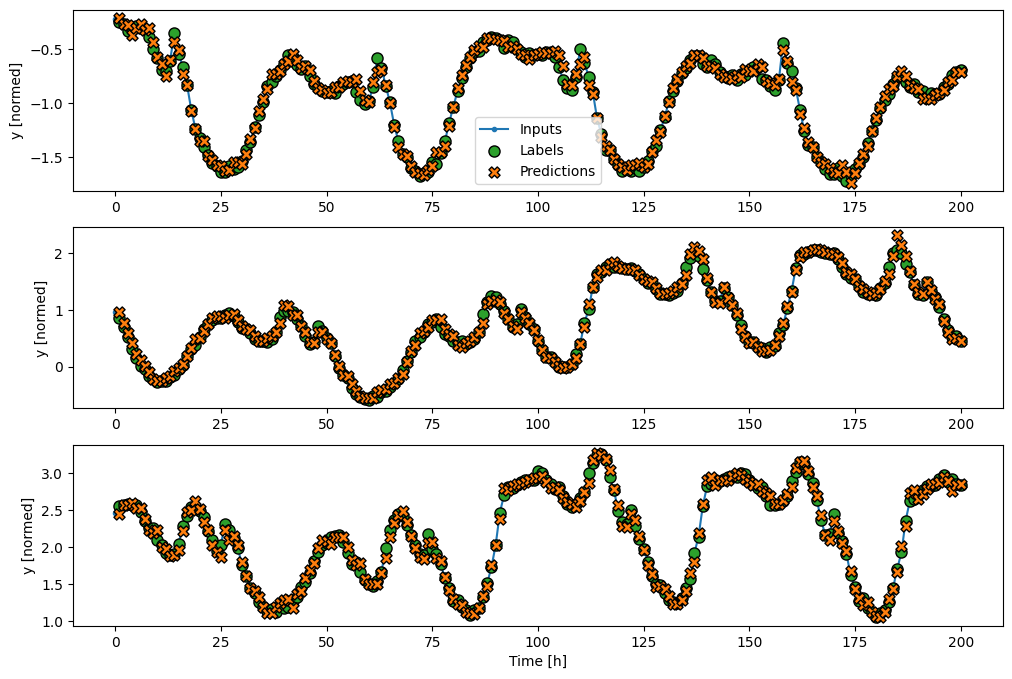

In [76]:
wide_RNN_window.plot(lstm_model)